In [3]:
#首先调用需要用到的包以及导入数据
import pandas as pd
import numpy as np
alldata = pd.read_csv('alldata.csv',index_col = 0)

In [6]:
#按照课本叙述定义缩尾函数，默认值为0.5%
def winsorize(series,degree):
    down = series.quantile(degree)
    up = series.quantile(1-degree)
    seriesname = series.name
    x = pd.Series(np.where(series<down, down, series),name = seriesname)
    x = pd.Series(np.where(x>up, up, x),name = seriesname)
    return x

def winsorize_wholedata(data,degree=0.005):
    temp = data.apply(lambda x:winsorize(x,degree))
    return temp

In [7]:
#计算person协方差和spearmann协方差（需要将完整的数据表格定义为：alldata）
def personcorr_calculator(dataname1,dataname2,degree=0.005):
    X = []
    for y in range(1988,2013):
        x = alldata[alldata['year'] == y]
        x = x[[dataname1,dataname2]]
        x = x.dropna(axis=0,how='any')
        temp = winsorize_wholedata(x,degree)
        person_corr = temp.corr().iloc[0,1]
        X.append(person_corr)
    X = pd.Series(X,index = range(1988,2013),name = dataname1+'_'+dataname2+'_p')
    return X

def spearmancorr_calculator(dataname1,dataname2):
    X = []
    for y in range(1988,2013):
        x = alldata[alldata['year'] == y]
        x = x[[dataname1,dataname2]]
        x = x.dropna(axis=0,how='any')
        spearman_corr = x.corr(method = 'spearman').iloc[0,1]
        X.append(spearman_corr)
    X = pd.Series(X,index = range(1988,2013),name = dataname1+'_'+dataname2+'_s')
    return X

In [9]:
#生成结果表格主函数
def corr_df():
    x1_p = personcorr_calculator('beta','size')
    x1_s = spearmancorr_calculator('beta','size')
    x2_p = personcorr_calculator('beta','bm')
    x2_s = spearmancorr_calculator('beta','bm')
    x3_p = personcorr_calculator('beta','rt+1')
    x3_s = spearmancorr_calculator('beta','rt+1')
    x4_p = personcorr_calculator('size','bm')
    x4_s = spearmancorr_calculator('size','bm')
    x5_p = personcorr_calculator('size','rt+1')
    x5_s = spearmancorr_calculator('size','rt+1')
    x6_p = personcorr_calculator('bm','rt+1')
    x6_s = spearmancorr_calculator('bm','rt+1')
    x = pd.concat([x1_p,x1_s,x2_p,x2_s,x3_p,x3_s,x4_p,x4_s,x5_p,x5_s,x6_p,x6_s],axis=1)
    return x

dataframe_corr = corr_df()
data_corr = dataframe_corr.apply(lambda x:round(x, 2))
data_corr

,beta_size_p,beta_size_s,beta_bm_p,beta_bm_s,beta_rt+1_p,beta_rt+1_s,size_bm_p,size_bm_s,size_rt+1_p,size_rt+1_s,bm_rt+1_p,bm_rt+1_s
1988,0.48,0.46,-0.13,-0.13,0.03,0.05,-0.14,-0.12,0.11,0.22,0.02,0.02
1989,0.45,0.45,-0.15,-0.20,0.01,0.03,-0.13,-0.15,0.08,0.18,-0.00,0.01
1990,0.43,0.45,-0.07,-0.20,0.06,0.15,-0.08,-0.19,-0.10,0.07,-0.04,-0.05
1991,0.43,0.46,-0.09,-0.21,-0.10,-0.11,-0.15,-0.21,-0.18,-0.07,0.15,0.23
1992,0.34,0.38,-0.14,-0.27,-0.11,-0.11,-0.18,-0.20,-0.15,-0.06,0.08,0.16
1993,0.35,0.37,-0.20,-0.23,-0.02,-0.05,-0.22,-0.19,-0.01,0.06,0.14,0.18
1994,0.31,0.35,-0.16,-0.21,0.02,0.02,-0.21,-0.19,-0.03,0.07,0.00,0.03
1995,0.31,0.32,-0.16,-0.24,-0.07,-0.09,-0.25,-0.23,-0.02,0.08,0.11,0.15
1996,0.29,0.32,-0.21,-0.32,-0.19,-0.21,-0.23,-0.24,0.02,0.08,0.12,0.18
1997,0.41,0.42,-0.17,-0.28,0.04,-0.00,-0.22,-0.26,0.08,0.17,0.03,0.01


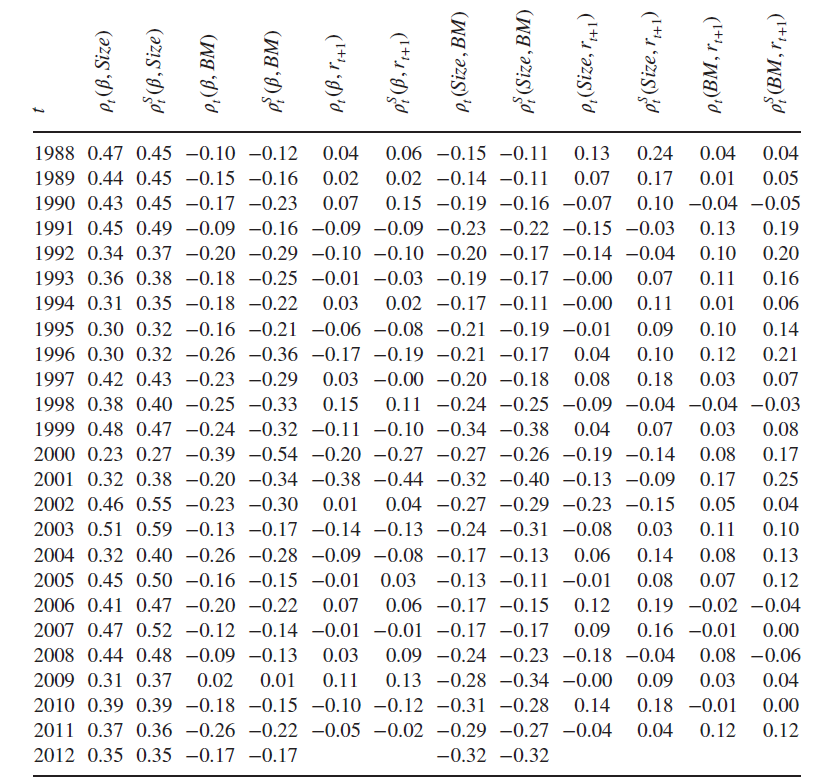

In [13]:
corr_mean = dataframe_corr.mean().apply(lambda x:round(x, 2))
corr_mean

beta_size_p    0.39
beta_size_s    0.42
beta_bm_p     -0.14
beta_bm_s     -0.19
beta_rt+1_p   -0.04
beta_rt+1_s   -0.05
size_bm_p     -0.21
size_bm_s     -0.24
size_rt+1_p   -0.04
size_rt+1_s    0.04
bm_rt+1_p      0.08
bm_rt+1_s      0.10
dtype: float64

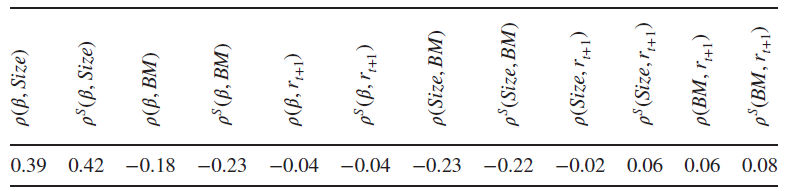